In [1]:
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakePerth

backend = AerSimulator.from_backend(FakePerth())

In [2]:
import qiskit
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import StateTomography

# GHZ State preparation circuit
nq = 2
qc_ghz = qiskit.QuantumCircuit(nq)
qc_ghz.h(0)
qc_ghz.s(0)
for i in range(1, nq):
    qc_ghz.cx(0, i)

# QST Experiment
qstexp1 = StateTomography(qc_ghz)
qstdata1 = qstexp1.run(backend, seed_simulation=100).block_for_results()

# Print results
for result in qstdata1.analysis_results():
    print(result)

AnalysisResult
- name: state
- value: DensityMatrix([[ 0.48453776+0.j        , -0.00520833+0.01595052j,
                 0.0078125 +0.01416016j,  0.00488281-0.44726562j],
               [-0.00520833-0.01595052j,  0.01806641+0.j        ,
                -0.01269531+0.j        , -0.01074219-0.00634766j],
               [ 0.0078125 -0.01416016j, -0.01269531+0.j        ,
                 0.02490234+0.j        , -0.00130208-0.00358073j],
               [ 0.00488281+0.44726562j, -0.01074219+0.00634766j,
                -0.00130208+0.00358073j,  0.47249349+0.j        ]],
              dims=(2, 2))
- extra: <7 items>
- device_components: ['Q0', 'Q1']
- verified: False
AnalysisResult
- name: state_fidelity
- value: 0.9257812499999993
- device_components: ['Q0', 'Q1']
- verified: False
AnalysisResult
- name: positive
- value: True
- device_components: ['Q0', 'Q1']
- verified: False


In [3]:
state_result = qstdata1.analysis_results("state")
print(state_result.value)

DensityMatrix([[ 0.48453776+0.j        , -0.00520833+0.01595052j,
                 0.0078125 +0.01416016j,  0.00488281-0.44726562j],
               [-0.00520833-0.01595052j,  0.01806641+0.j        ,
                -0.01269531+0.j        , -0.01074219-0.00634766j],
               [ 0.0078125 -0.01416016j, -0.01269531+0.j        ,
                 0.02490234+0.j        , -0.00130208-0.00358073j],
               [ 0.00488281+0.44726562j, -0.01074219+0.00634766j,
                -0.00130208+0.00358073j,  0.47249349+0.j        ]],
              dims=(2, 2))


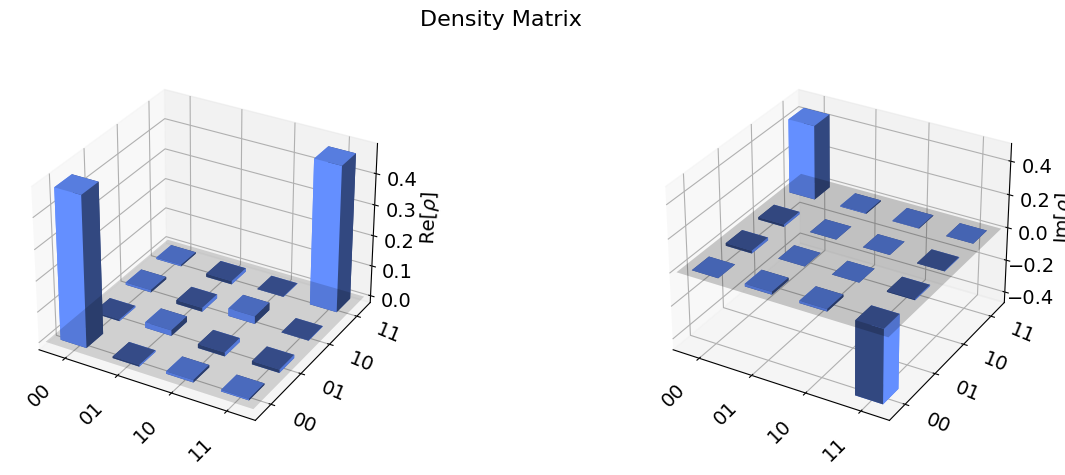

In [4]:
from qiskit.visualization import plot_state_city
plot_state_city(qstdata1.analysis_results("state").value, title='Density Matrix')

In [5]:
fid_result = qstdata1.analysis_results("state_fidelity")
print("State Fidelity = {:.5f}".format(fid_result.value))

State Fidelity = 0.92578


In [6]:
state_result.extra

{'trace': 1.0000000000000018,
 'eigvals': array([0.92644462, 0.04294185, 0.02650768, 0.00410584]),
 'raw_eigvals': array([0.92644462, 0.04294185, 0.02650768, 0.00410584]),
 'rescaled_psd': False,
 'fitter_metadata': {'fitter': 'linear_inversion',
  'fitter_time': 0.01043391227722168},
 'conditional_probability': 1.0,
 'positive': True}

In [7]:
# QST Experiment
bad_data = qstexp1.run(backend, shots=10, seed_simulation=100).block_for_results()
bad_state_result = bad_data.analysis_results("state")

# Print result
print(bad_state_result)

# Show extra data
bad_state_result.extra

AnalysisResult
- name: state
- value: DensityMatrix([[ 0.57870842+0.j        , -0.08720174-0.09490048j,
                 0.06543818+0.01212909j,  0.00581984-0.42942807j],
               [-0.08720174+0.09490048j,  0.0466329 +0.j        ,
                -0.04087913+0.00837051j,  0.06485604+0.06661772j],
               [ 0.06543818-0.01212909j, -0.04087913-0.00837051j,
                 0.05466857+0.j        , -0.0007816 -0.05036662j],
               [ 0.00581984+0.42942807j,  0.06485604-0.06661772j,
                -0.0007816 +0.05036662j,  0.31999012+0.j        ]],
              dims=(2, 2))
- extra: <7 items>
- device_components: ['Q0', 'Q1']
- verified: False


{'trace': 1.0000000000000013,
 'eigvals': array([0.93547083, 0.06452917, 0.        , 0.        ]),
 'raw_eigvals': array([ 1.06467576,  0.19373409, -0.01867506, -0.23973478]),
 'rescaled_psd': True,
 'fitter_metadata': {'fitter': 'linear_inversion',
  'fitter_time': 0.008608579635620117},
 'conditional_probability': 1.0,
 'positive': True}

In [8]:
try:
    import cvxpy

    # Set analysis option for cvxpy fitter
    qstexp1.analysis.set_options(fitter='cvxpy_gaussian_lstsq')

    # Re-run experiment
    qstdata2 = qstexp1.run(backend, seed_simulation=100).block_for_results()

    state_result2 = qstdata2.analysis_results("state")
    print(state_result2)
    print("\nextra:")
    for key, val in state_result2.extra.items():
        print(f"- {key}: {val}")

except ModuleNotFoundError:
    print("CVXPY is not installed")

AnalysisResult
- name: state
- value: DensityMatrix([[ 0.48531667+0.j        ,  0.00691087-0.00060361j,
                -0.02600618+0.00853606j,  0.00434474-0.4533876j ],
               [ 0.00691087+0.00060361j,  0.01622855+0.j        ,
                -0.00223458-0.00078715j,  0.02423642-0.00466792j],
               [-0.02600618-0.00853606j, -0.00223458+0.00078715j,
                 0.02074062+0.j        , -0.00954318+0.00620845j],
               [ 0.00434474+0.4533876j ,  0.02423642+0.00466792j,
                -0.00954318-0.00620845j,  0.47771416+0.j        ]],
              dims=(2, 2))
- extra: <7 items>
- device_components: ['Q0', 'Q1']
- verified: False

extra:
- trace: 0.9999999990072697
- eigvals: [9.36100378e-01 4.52350021e-02 1.86644761e-02 1.44164132e-07]
- raw_eigvals: [9.36100379e-01 4.52350022e-02 1.86644761e-02 1.44164132e-07]
- rescaled_psd: False
- fitter_metadata: {'fitter': 'cvxpy_gaussian_lstsq', 'cvxpy_solver': 'SCS', 'cvxpy_status': ['optimal'], 'psd_constraint':

In [9]:
from math import pi
num_qubits = 5
gates = [qiskit.circuit.library.RXGate(i * pi / (num_qubits - 1))
         for i in range(num_qubits)]

subexps = [
    StateTomography(gate, physical_qubits=[i])
    for i, gate in enumerate(gates)
]
parexp = ParallelExperiment(subexps)
pardata = parexp.run(backend, seed_simulation=100).block_for_results()

for result in pardata.analysis_results():
    print(result)

In [10]:
for i, expdata in enumerate(pardata.child_data()):
    state_result_i = expdata.analysis_results("state")
    fid_result_i = expdata.analysis_results("state_fidelity")

    print(f'\nPARALLEL EXP {i}')
    print("State Fidelity: {:.5f}".format(fid_result_i.value))
    print("State: {}".format(state_result_i.value))


PARALLEL EXP 0
State Fidelity: 0.98340
State: DensityMatrix([[ 0.98339844+0.j      , -0.01855469-0.015625j],
               [-0.01855469+0.015625j,  0.01660156+0.j      ]],
              dims=(2,))

PARALLEL EXP 1
State Fidelity: 0.96749
State: DensityMatrix([[0.83105469+0.j        , 0.00488281+0.33007812j],
               [0.00488281-0.33007812j, 0.16894531+0.j        ]],
              dims=(2,))

PARALLEL EXP 2
State Fidelity: 0.98242
State: DensityMatrix([[ 0.49707031+0.j        , -0.02929688+0.48242188j],
               [-0.02929688-0.48242188j,  0.50292969+0.j        ]],
              dims=(2,))

PARALLEL EXP 3
State Fidelity: 0.99787
State: DensityMatrix([[0.15527344+0.j      , 0.00878906+0.359375j],
               [0.00878906-0.359375j, 0.84472656+0.j      ]],
              dims=(2,))

PARALLEL EXP 4
State Fidelity: 0.97559
State: DensityMatrix([[0.02441406+0.j        , 0.00390625-0.00390625j],
               [0.00390625+0.00390625j, 0.97558594+0.j        ]],
              dims